In [1]:
from scipy.sparse import random as sprand 
import numpy as np 
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER

A = sprand(4,4, density=0.8, format='csr')
A = np.random.rand(4,4)
A = A+A.T
b = np.random.rand(4)

In [2]:
ref = np.linalg.solve(A,b)
ref

array([ 1.00590426,  4.4264984 ,  2.86687851, -7.09078348])

In [14]:
from qiskit.primitives import Estimator 
from qiskit.circuit.library import RealAmplitudes 
from qiskit.algorithms.optimizers import ADAM, COBYLA

estimator = Estimator()
ansatz = RealAmplitudes(1, reps=3)
optim = COBYLA()

In [15]:
quantum_solver_options = {'estimator':estimator, 'ansatz':ansatz, 'optimizer':optim}
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition='symmetric')

In [16]:
sol = solver(A, b)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


[[ 0.02483541 -0.4       ]
 [-0.4        -0.08511699]] [0.01959498 0.08364447]


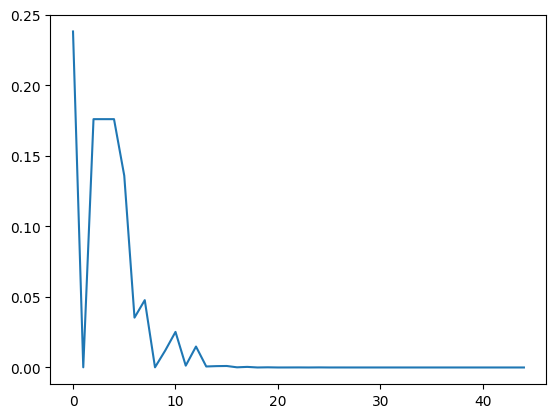

In [18]:
import matplotlib.pyplot as plt 
plt.plot(sol.logger.values)

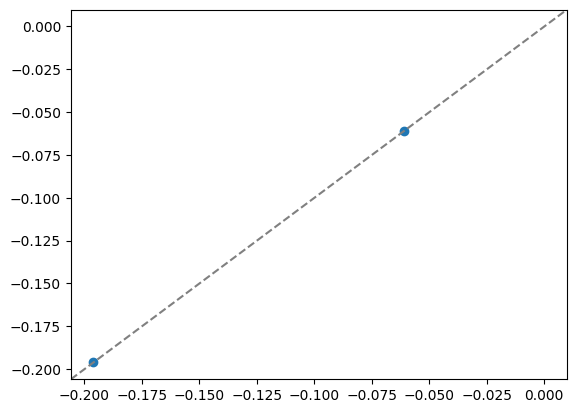

In [19]:
import matplotlib.pyplot as plt 
plt.scatter(np.linalg.solve(A,b), sol.solution)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')

In [ ]:
quantum_solver_options = {'estimator':estimator, 'ansatz':ansatz, 'optimizer':optim}
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition='symmetric')
sol = solver(A, b)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


4.7795744326339413e-05


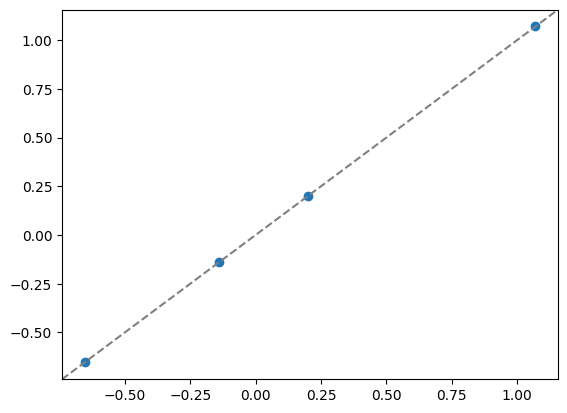

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(sol.solution, ref)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')